In [1]:
! pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 669.5 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 4.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose_hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=98351 sha256=5295438d0158e9e82440701e773b02ad54cad46a9d064f07ba2ce96c0a3f1c86
  Stored in directory: /Users/anurag/Library/Caches/pip/wheels/7b/fd/bf/f234df7edc5b514c706ec76a58be2770921ae7ce75a384f74c
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=4d6d3a41aa07a48ca89ff01a8a6f12ec4119ea8a2748330d9dce6cf2d9b54817
  Stored in directory: /Users/anurag/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built mlrose_hiive sklearn


In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import time
import random
import mlrose_hiive
np.random.seed(903680005)

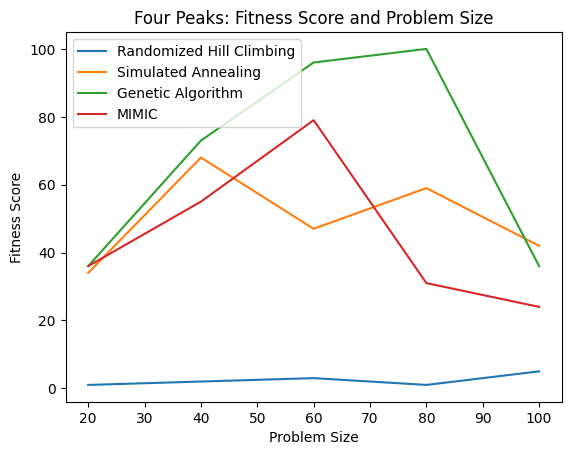

In [3]:
length_val = np.arange(20, 101, 20)
rhc_fitness = []
sa_fitness = []
ga_fitness = []
mim_fitness = []
rhc_time = []
sa_time = []
ga_time = []
mim_time = []

# Varying problem size
for i in length_val:
    fitness = mlrose_hiive.ContinuousPeaks(t_pct=0.15)
    problem = mlrose_hiive.DiscreteOpt(length = i, fitness_fn=fitness, maximize=True)
    problem.set_mimic_fast_mode(True)
    init_state = np.random.randint(2, size=i)
    
    # Random Hill Climbing
    st_time = time.time()
    _,best_fitness_rhc,_ = mlrose_hiive.random_hill_climb(problem, max_attempts=10, 
                                                          max_iters=2500, init_state = init_state, curve=True, random_state=np.random.seed())
    rhc_time.append(time.time() - st_time)
    rhc_fitness.append(best_fitness_rhc)
    
    # Simulated Annealing
    st_time = time.time()
    _,best_fitness_sa,_ = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.ExpDecay(), 
                                                          max_attempts=10, max_iters=2500, 
                                                           init_state=init_state, curve=True, random_state=np.random.seed())
    sa_time.append(time.time() - st_time)
    sa_fitness.append(best_fitness_sa)
    
    # Genetic Algorithm
    st_time = time.time()
    _,best_fitness_ga,_ = mlrose_hiive.genetic_alg(problem, max_attempts=10, curve=True, random_state=np.random.seed())
    ga_time.append(time.time() - st_time)
    ga_fitness.append(best_fitness_ga)
    
    # MIMIC
    st_time = time.time()
    _,best_fitness_mim,_ = mlrose_hiive.mimic(problem, pop_size=200,max_attempts=10, curve=True, random_state=np.random.seed())
    mim_time.append(time.time() - st_time)
    mim_fitness.append(best_fitness_mim)
    
    
plt.figure()
plt.plot(length_val,rhc_fitness, label='Randomized Hill Climbing')
plt.plot(length_val,sa_fitness, label='Simulated Annealing')
plt.plot(length_val,ga_fitness, label='Genetic Algorithm')
plt.plot(length_val,mim_fitness, label='MIMIC')
plt.title('Four Peaks: Fitness Score and Problem Size')
plt.xlabel('Problem Size')
plt.ylabel('Fitness Score')
plt.legend()
plt.savefig('./plots/FourPeaks_fitness_problem.png')
plt.show()
    

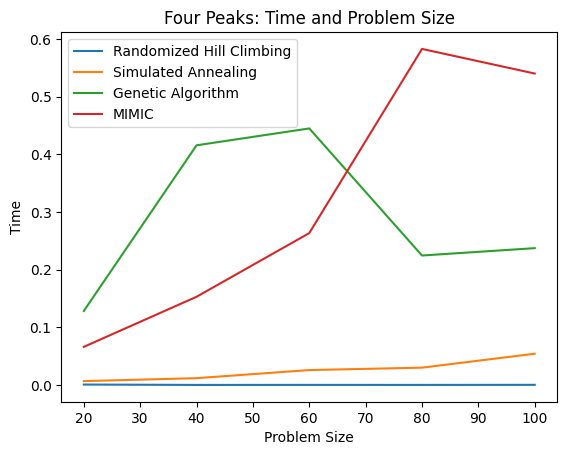

In [4]:
plt.figure()
plt.plot(length_val,rhc_time, label='Randomized Hill Climbing')
plt.plot(length_val,sa_time, label='Simulated Annealing')
plt.plot(length_val,ga_time, label='Genetic Algorithm')
plt.plot(length_val,mim_time, label='MIMIC')
plt.title('Four Peaks: Time and Problem Size')
plt.xlabel('Problem Size')
plt.ylabel('Time')
plt.legend()
plt.savefig('./plots/FourPeaks_time_problem.png')
plt.show()

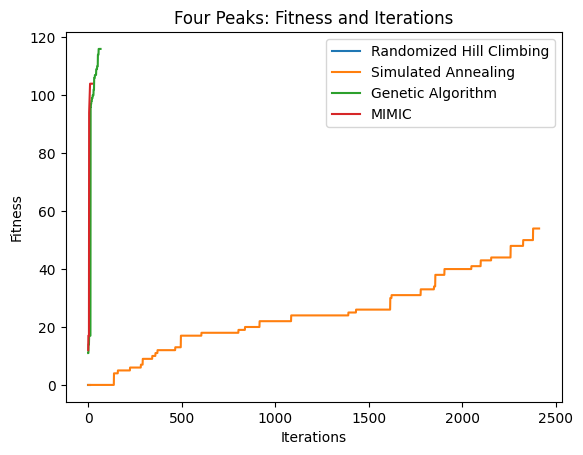

In [8]:
# Fitness curve with iterations
fitness = mlrose_hiive.FourPeaks(t_pct=0.15)
problem = mlrose_hiive.DiscreteOpt(length = 80, fitness_fn=fitness, maximize=True)
problem.set_mimic_fast_mode(True)
init_state = np.random.randint(2, size=80)
_,_,fitness_rhc = mlrose_hiive.random_hill_climb(problem, max_attempts=10, 
                                                          max_iters=2500, init_state = init_state, curve=True, random_state=np.random.seed())
_,_,fitness_sa = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.ExpDecay(), 
                                                          max_attempts=10, max_iters=2500, 
                                                           init_state=init_state, curve=True, random_state=np.random.seed())
_,_,fitness_ga = mlrose_hiive.genetic_alg(problem, max_attempts=10, curve=True, random_state=np.random.seed())
_,_,fitness_mim = mlrose_hiive.mimic(problem, pop_size=200,max_attempts=10, curve=True, random_state=np.random.seed())

plt.figure()
plt.plot(fitness_rhc[:,0], label='Randomized Hill Climbing')
plt.plot(fitness_sa[:,0], label='Simulated Annealing')
plt.plot(fitness_ga[:,0], label='Genetic Algorithm')
plt.plot(fitness_mim[:,0], label='MIMIC')
plt.title('Four Peaks: Fitness and Iterations')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.legend()
plt.savefig('./plots/FourPeaks_fitness_iterations.png')
plt.show()

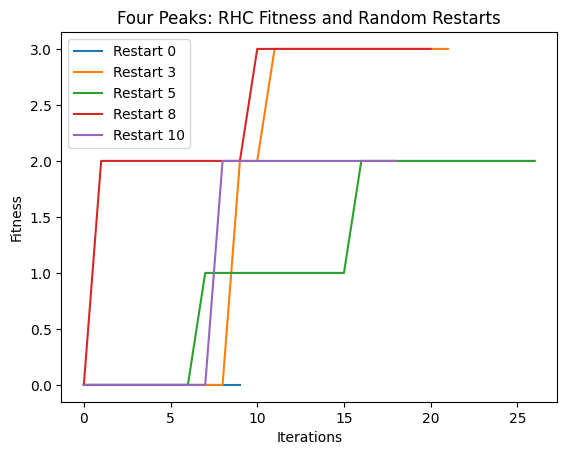

In [9]:
# Random Hill Climbing hyperparameters 
_,_,fitness_rhc_0 = mlrose_hiive.random_hill_climb(problem, max_attempts=10, restarts=0,max_iters=2500, init_state = init_state, curve=True, random_state=np.random.seed())
_,_,fitness_rhc_1 = mlrose_hiive.random_hill_climb(problem, max_attempts=10, restarts=3,max_iters=2500, init_state = init_state, curve=True, random_state=np.random.seed())
_,_,fitness_rhc_2 = mlrose_hiive.random_hill_climb(problem, max_attempts=10, restarts=5,max_iters=2500, init_state = init_state, curve=True, random_state=np.random.seed())
_,_,fitness_rhc_3 = mlrose_hiive.random_hill_climb(problem, max_attempts=10, restarts=8,max_iters=2500, init_state = init_state, curve=True, random_state=np.random.seed())
_,_,fitness_rhc_4 = mlrose_hiive.random_hill_climb(problem, max_attempts=10, restarts=10,max_iters=2500, init_state = init_state, curve=True, random_state=np.random.seed())

plt.figure()
plt.plot(fitness_rhc_0[:,0],label='Restart 0')
plt.plot(fitness_rhc_1[:,0],label='Restart 3')
plt.plot(fitness_rhc_2[:,0],label='Restart 5')
plt.plot(fitness_rhc_3[:,0],label='Restart 8')
plt.plot(fitness_rhc_4[:,0],label='Restart 10')
plt.title('Four Peaks: RHC Fitness and Random Restarts')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.legend()
plt.savefig('./plots/FourPeaks_RHC_fitness_restarts.png')
plt.show()

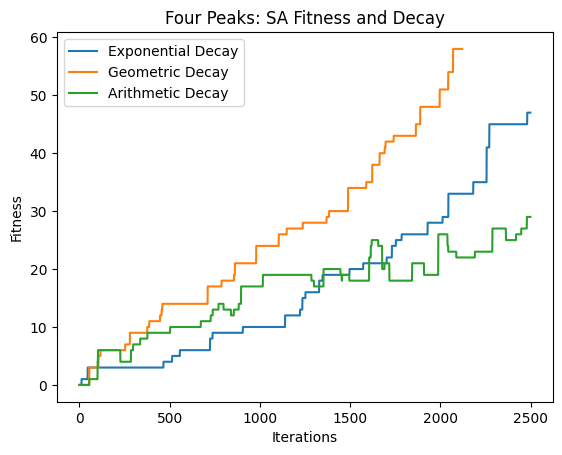

In [10]:
# Simulated Annealing hyperparameters
_,_,fitness_sa_0 = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.ExpDecay(), max_attempts=10, max_iters=2500, init_state=init_state, curve=True, random_state=np.random.seed())
_,_,fitness_sa_1 = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(), max_attempts=10, max_iters=2500, init_state=init_state, curve=True, random_state=np.random.seed())
_,_,fitness_sa_2 = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.ArithDecay(), max_attempts=10, max_iters=2500, init_state=init_state, curve=True, random_state=np.random.seed())

plt.figure()
plt.plot(fitness_sa_0[:,0], label='Exponential Decay')
plt.plot(fitness_sa_1[:,0], label='Geometric Decay')
plt.plot(fitness_sa_2[:,0], label='Arithmetic Decay')
plt.title('Four Peaks: SA Fitness and Decay')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.legend()
plt.savefig('./plots/FourPeaks_SA_fitness_decay.png')
plt.show()


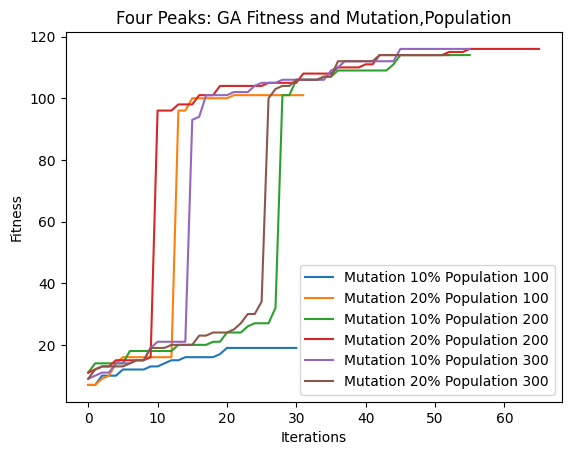

In [11]:
# Genetic Algorithm hyperparameters
_,_,fitness_ga_0 = mlrose_hiive.genetic_alg(problem,mutation_prob=0.1,pop_size = 100,max_attempts=10, curve=True, random_state=np.random.seed())
_,_,fitness_ga_1 = mlrose_hiive.genetic_alg(problem,mutation_prob=0.2,pop_size = 100,max_attempts=10, curve=True, random_state=np.random.seed())
_,_,fitness_ga_2 = mlrose_hiive.genetic_alg(problem,mutation_prob=0.1,pop_size = 200,max_attempts=10, curve=True, random_state=np.random.seed())
_,_,fitness_ga_3 = mlrose_hiive.genetic_alg(problem,mutation_prob=0.2,pop_size = 200,max_attempts=10, curve=True, random_state=np.random.seed())
_,_,fitness_ga_4 = mlrose_hiive.genetic_alg(problem,mutation_prob=0.1,pop_size = 300,max_attempts=10, curve=True, random_state=np.random.seed())
_,_,fitness_ga_5 = mlrose_hiive.genetic_alg(problem,mutation_prob=0.2,pop_size = 300,max_attempts=10, curve=True, random_state=np.random.seed())

plt.figure()
plt.plot(fitness_ga_0[:,0], label = 'Mutation 10% Population 100')
plt.plot(fitness_ga_1[:,0], label = 'Mutation 20% Population 100')
plt.plot(fitness_ga_2[:,0], label = 'Mutation 10% Population 200')
plt.plot(fitness_ga_3[:,0], label = 'Mutation 20% Population 200')
plt.plot(fitness_ga_4[:,0], label = 'Mutation 10% Population 300')
plt.plot(fitness_ga_5[:,0], label = 'Mutation 20% Population 300')
plt.title('Four Peaks: GA Fitness and Mutation,Population')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.legend()
plt.savefig('./plots/FourPeaks_GA_fitness_mutation_population.png')
plt.show()


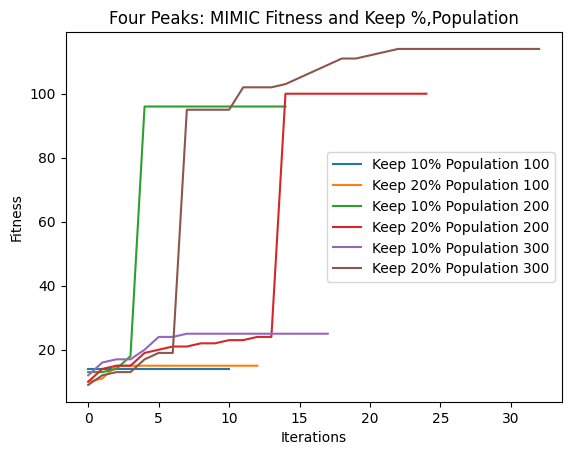

In [12]:
# MIMIC hyperparameters
_,_,fitness_mim_0 = mlrose_hiive.mimic(problem, keep_pct=0.1,pop_size=100,max_attempts=10, curve=True, random_state=np.random.seed())
_,_,fitness_mim_1 = mlrose_hiive.mimic(problem, keep_pct=0.2,pop_size=100,max_attempts=10, curve=True, random_state=np.random.seed())
_,_,fitness_mim_2 = mlrose_hiive.mimic(problem, keep_pct=0.1,pop_size=200,max_attempts=10, curve=True, random_state=np.random.seed())
_,_,fitness_mim_3 = mlrose_hiive.mimic(problem, keep_pct=0.2,pop_size=200,max_attempts=10, curve=True, random_state=np.random.seed())
_,_,fitness_mim_4 = mlrose_hiive.mimic(problem, keep_pct=0.1,pop_size=300,max_attempts=10, curve=True, random_state=np.random.seed())
_,_,fitness_mim_5 = mlrose_hiive.mimic(problem, keep_pct=0.2,pop_size=300,max_attempts=10, curve=True, random_state=np.random.seed())

plt.figure()
plt.plot(fitness_mim_0[:,0], label = 'Keep 10% Population 100')
plt.plot(fitness_mim_1[:,0], label = 'Keep 20% Population 100')
plt.plot(fitness_mim_2[:,0], label = 'Keep 10% Population 200')
plt.plot(fitness_mim_3[:,0], label = 'Keep 20% Population 200')
plt.plot(fitness_mim_4[:,0], label = 'Keep 10% Population 300')
plt.plot(fitness_mim_5[:,0], label = 'Keep 20% Population 300')
plt.title('Four Peaks: MIMIC Fitness and Keep %,Population')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.legend()
plt.savefig('./plots/FourPeaks_MIMIC_fitness_keep_population.png')
plt.show()